In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt

import matplotlib.pyplot as plt


In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
def option_chains(ticker):
    """
    """
    asset = yf.Ticker(ticker)
    expirations = asset.options
    
    chains = pd.DataFrame()
    
    for expiration in expirations:
        # tuple of two dataframes
        opt = asset.option_chain(expiration)
        
        calls = opt.calls
        calls['optionType'] = "call"
        
        puts = opt.puts
        puts['optionType'] = "put"
        
        chain = pd.concat([calls, puts])
        chain['expiration'] = pd.to_datetime(expiration) + pd.DateOffset(hours=23, minutes=59, seconds=59)
        
        chains = pd.concat([chains, chain])
    
    chains["daysToExpiration"] = (chains.expiration - dt.datetime.today()).dt.days + 1
    
    return chains

In [6]:
asset=yf.Ticker('^SPX')

In [7]:
asset.option_chain(asset.options[0]).calls

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency
0,SPXW250422C04400000,2025-04-22 13:36:01+00:00,4400.0,811.93,844.2,862.40,99.95001,14.038318,1.0,4,0.000010,True,REGULAR,USD
1,SPXW250422C04500000,2025-04-21 13:37:01+00:00,4500.0,715.77,754.2,772.20,0.00000,0.000000,1.0,0,1.200688,True,REGULAR,USD
2,SPXW250422C04600000,2025-04-21 17:00:08+00:00,4600.0,530.00,653.6,671.60,0.00000,0.000000,4.0,5,0.000010,True,REGULAR,USD
3,SPXW250422C04690000,2025-04-17 16:09:28+00:00,4690.0,613.14,554.7,572.80,0.00000,0.000000,1.0,1,0.000010,True,REGULAR,USD
4,SPXW250422C04700000,2025-04-22 13:49:27+00:00,4700.0,546.00,563.4,564.00,89.81000,19.686972,24.0,88,0.000010,True,REGULAR,USD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,SPXW250422C06300000,2025-04-21 13:34:14+00:00,6300.0,0.05,0.0,0.05,0.00000,0.000000,16.0,25,0.996094,False,REGULAR,USD
200,SPXW250422C06400000,2025-04-16 19:41:32+00:00,6400.0,0.05,0.0,0.05,0.00000,0.000000,1.0,3,1.078130,False,REGULAR,USD
201,SPXW250422C06600000,2025-03-27 15:16:56+00:00,6600.0,0.15,0.0,0.05,0.00000,0.000000,2.0,3,1.234379,False,REGULAR,USD
202,SPXW250422C06800000,2025-04-07 20:04:40+00:00,6800.0,0.28,0.0,0.05,0.00000,0.000000,2.0,1,1.390628,False,REGULAR,USD


In [10]:
options = option_chains("^SPX")

<Axes: title={'center': 'Implied Volatility Skew'}, xlabel='strike'>

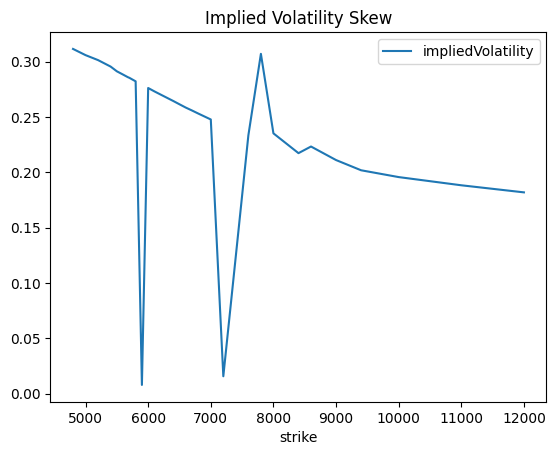

In [11]:
calls = options[options["optionType"] == "call"]

# select an expiration to plot
calls_at_expiry = calls[calls["expiration"] == calls.expiration.iloc[-1]]

# filter out low vols
filtered_calls_at_expiry = calls_at_expiry[calls_at_expiry.impliedVolatility >= 0.001]

# set the strike as the index so pandas plots nicely
filtered_calls_at_expiry[["strike", "impliedVolatility"]].set_index("strike").plot(
    title="Implied Volatility Skew"
)

<Axes: title={'center': 'Implied Volatility Term Structure'}, xlabel='expiration'>

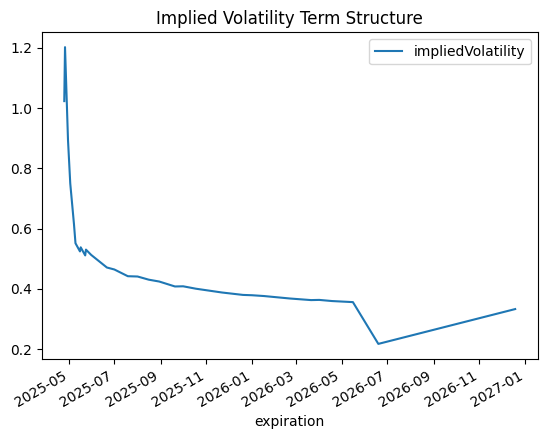

In [13]:
calls_at_strike = calls[(calls["strike"] ==4000)]

# filter out low vols
filtered_calls_at_strike = calls_at_strike[calls_at_strike.impliedVolatility >= 0.0001]

# set the strike as the index so pandas plots nicely
filtered_calls_at_strike[["expiration", "impliedVolatility"]].set_index("expiration").plot(
    title="Implied Volatility Term Structure"
)

In [17]:
calls[['daysToExpiration', 'strike', 'impliedVolatility']].pivot_table(values='impliedVolatility', index='strike', columns='daysToExpiration').replacena

daysToExpiration,1,2,3,4,7,8,9,10,11,14,...,333,344,361,389,423,606,970,1334,1705,2069
strike,,,,,,,,,,,,,,,,,,,,,
200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000010,NaN,0.00001,NaN,0.000010,0.000010,NaN,NaN,NaN,NaN
400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,0.000010,0.000010,0.000000,NaN
500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.717744,NaN,NaN,NaN,NaN
800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.000010,0.000010,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.235786,NaN,NaN,NaN,0.210701,NaN,NaN,NaN,NaN,NaN
10800.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


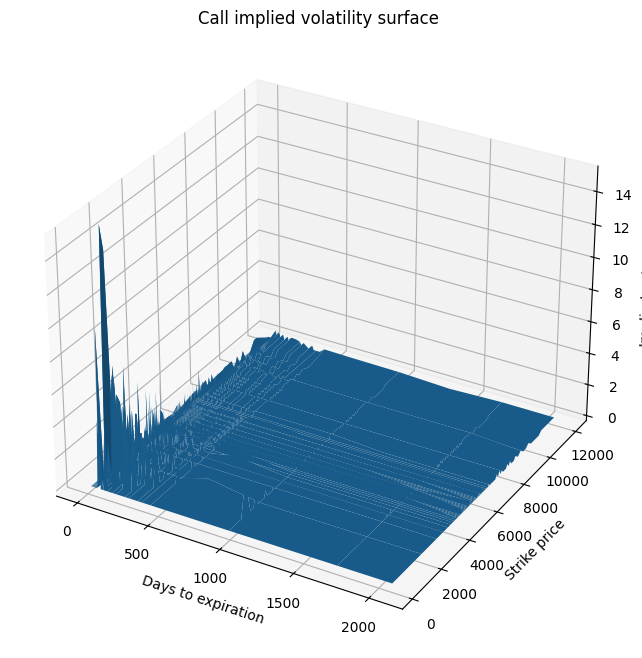

In [18]:
# pivot the dataframe
surface = (
    calls[['daysToExpiration', 'strike', 'impliedVolatility']]
    .pivot_table(values='impliedVolatility', index='strike', columns='daysToExpiration',fill_value=0.0001)
    .dropna()
)

# create the figure object
fig = plt.figure(figsize=(10, 8))

# add the subplot with projection argument
ax = fig.add_subplot(111, projection='3d')

# get the 1d values from the pivoted dataframe
x, y, z = surface.columns.values, surface.index.values, surface.values

# return coordinate matrices from coordinate vectors
X, Y = np.meshgrid(x, y)

# set labels
ax.set_xlabel('Days to expiration')
ax.set_ylabel('Strike price')
ax.set_zlabel('Implied volatility')
ax.set_title('Call implied volatility surface')

# plot
ax.plot_surface(X, Y, z)